In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde

mean of sample:  1.8846660279111624
standar deviation of sample:  1.0079848962223332


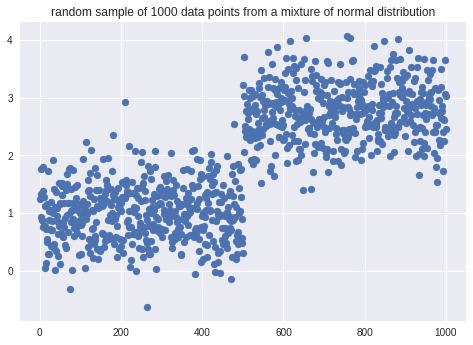

In [2]:
np.random.seed(42) # seed is used to make the result reproducible
sz = 500

x1 = norm.rvs(loc = 1, scale = 0.5, size=sz)
x2 = norm.rvs(loc = 2.75, scale = 0.5, size=sz)

x = np.concatenate((x1, x2)) # mixture of normal distributions
index_x = np.linspace(1, 2*sz, 2*sz)
plt.scatter(index_x, x)
plt.title('random sample of 1000 data points from a mixture of normal distribution')

mean_x = np.mean(x)
sd_x = np.std(x)

print("mean of sample: ", mean_x)
print("standar deviation of sample: ", sd_x)

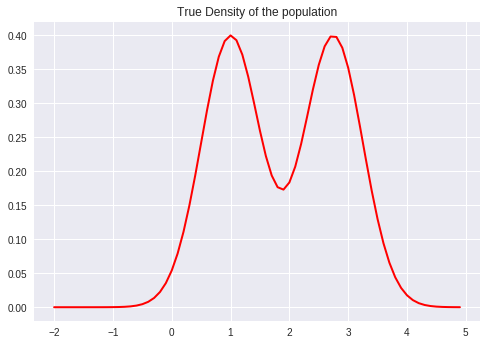

In [0]:
fig, ax = plt.subplots(1,1)

x_test = np.arange(-2, 5, 0.1)

# the true density
ax.plot(x_test, 0.5*norm.pdf(x_test, loc = 1, scale = 0.5) + 0.5*norm.pdf(x_test, loc = 2.75, scale = 0.5), 'k-', lw=2, color = 'red')
plt.title('True Density of the population')
plt.show()

In [0]:
# Let's try to estimate the true density using non-parametric techniques and try to visualize the double hump pattern

# 1. Histograms

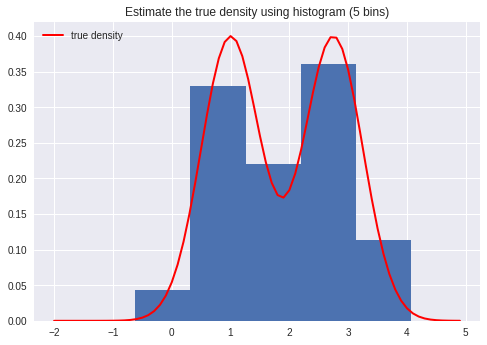

In [0]:
fig, ax = plt.subplots(1,1)
ax.hist(x, bins = 5, density = True) # can't see the pattern easily
ax.plot(x_test, 0.5*norm.pdf(x_test, loc = 1, scale = 0.5) + 0.5*norm.pdf(x_test, loc = 2.75, scale = 0.5), 'k-', lw=2, color = 'red', label = 'true density')
ax.legend(loc=2, frameon=False)
plt.title('Estimate the true density using histogram (5 bins)')
plt.show()

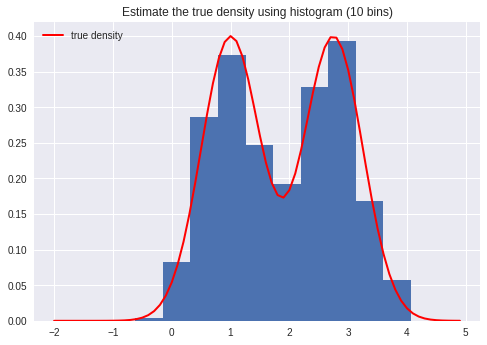

In [0]:
fig, ax = plt.subplots(1,1)
ax.hist(x, bins = 10, density = True) # can see the pattern now
ax.plot(x_test, 0.5*norm.pdf(x_test, loc = 1, scale = 0.5) + 0.5*norm.pdf(x_test, loc = 2.75, scale = 0.5), 'k-', lw=2, color = 'red', label = 'true density')
ax.legend(loc=2, frameon=False)
plt.title('Estimate the true density using histogram (10 bins)')
plt.show()

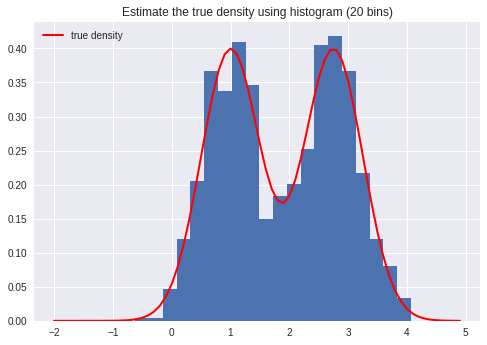

In [0]:
fig, ax = plt.subplots(1,1)
ax.hist(x, bins = 20, density = True) # The pattern is becoming clear!!
ax.plot(x_test, 0.5*norm.pdf(x_test, loc = 1, scale = 0.5) + 0.5*norm.pdf(x_test, loc = 2.75, scale = 0.5), 'k-', lw=2, color = 'red', label = 'true density')
ax.legend(loc=2, frameon=False)
plt.title('Estimate the true density using histogram (20 bins)')
plt.show()

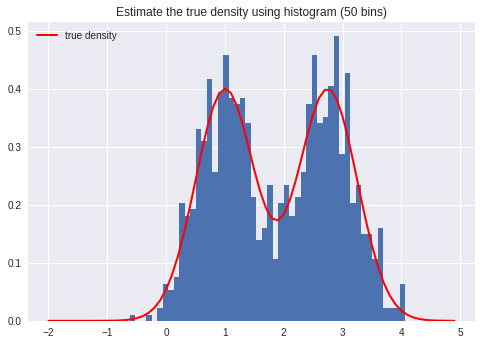

In [0]:
fig, ax = plt.subplots(1,1)
ax.hist(x, bins = 50, density = True) # The pattern is very clear. But, it also starts to get noisier
ax.plot(x_test, 0.5*norm.pdf(x_test, loc = 1, scale = 0.5) + 0.5*norm.pdf(x_test, loc = 2.75, scale = 0.5), 'k-', lw=2, color = 'red', label = 'true density')
ax.legend(loc=2, frameon=False)
plt.title('Estimate the true density using histogram (50 bins)')
plt.show()

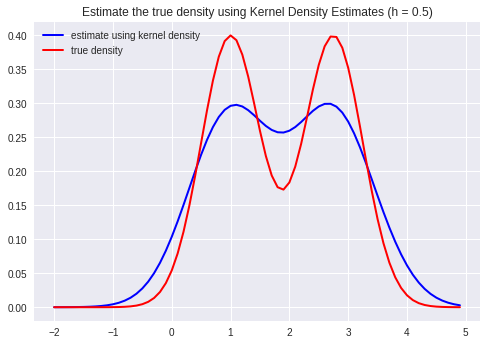

In [0]:
# 2. Kernel Density Estimates
fig, ax = plt.subplots(1,1)
kde = gaussian_kde(dataset = x, bw_method = 0.5) # too high bandwidth

ax.plot(x_test, kde.pdf(x_test), 'k-', lw=2, color = 'blue', label = 'estimate using kernel density')
ax.plot(x_test, 0.5*norm.pdf(x_test, loc = 1, scale = 0.5) + 0.5*norm.pdf(x_test, loc = 2.75, scale = 0.5), 'k-', lw=2, color = 'red', label = 'true density')
ax.legend(loc=2, frameon=False)
plt.title('Estimate the true density using Kernel Density Estimates (h = 0.5)')
plt.show()

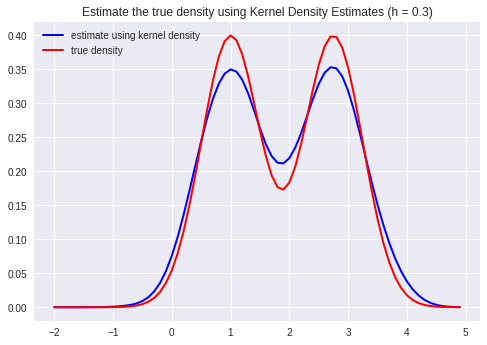

In [0]:
fig, ax = plt.subplots(1,1)
kde = gaussian_kde(dataset = x, bw_method = 0.3) # slightly better

ax.plot(x_test, kde.pdf(x_test), 'k-', lw=2, color = 'blue', label = 'estimate using kernel density')
ax.plot(x_test, 0.5*norm.pdf(x_test, loc = 1, scale = 0.5) + 0.5*norm.pdf(x_test, loc = 2.75, scale = 0.5), 'k-', lw=2, color = 'red', label = 'true density')
ax.legend(loc=2, frameon=False)
plt.title('Estimate the true density using Kernel Density Estimates (h = 0.3)')
plt.show()

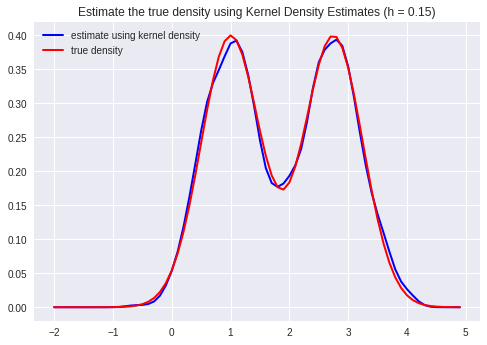

In [0]:
fig, ax = plt.subplots(1,1)
kde = gaussian_kde(dataset = x, bw_method = 0.15) # looks like optimal value !!

ax.plot(x_test, kde.pdf(x_test), 'k-', lw=2, color = 'blue', label = 'estimate using kernel density')
ax.plot(x_test, 0.5*norm.pdf(x_test, loc = 1, scale = 0.5) + 0.5*norm.pdf(x_test, loc = 2.75, scale = 0.5), 'k-', lw=2, color = 'red', label = 'true density')
ax.legend(loc=2, frameon=False)
plt.title('Estimate the true density using Kernel Density Estimates (h = 0.15)')
plt.show()

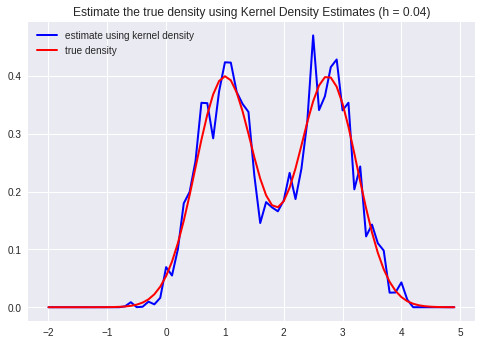

In [0]:
fig, ax = plt.subplots(1,1)
kde = gaussian_kde(dataset = x, bw_method = 0.04) # too low bandwidth (got noisier)

ax.plot(x_test, kde.pdf(x_test), 'k-', lw=2, color = 'blue', label = 'estimate using kernel density')
ax.plot(x_test, 0.5*norm.pdf(x_test, loc = 1, scale = 0.5) + 0.5*norm.pdf(x_test, loc = 2.75, scale = 0.5), 'k-', lw=2, color = 'red', label = 'true density')
ax.legend(loc=2, frameon=False)
plt.title('Estimate the true density using Kernel Density Estimates (h = 0.04)')
plt.show()